## Import packages

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as py 

## Load Data

In [2]:
df = pd.read_csv("data.csv")

## Data glimpse

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
## PatientId and AppointmentID don't provide any adittional information, so I will drop it

In [7]:
df.drop(["PatientId","AppointmentID"], axis = 1, inplace=True)

In [8]:
##Converting to date format 

df.iloc[:,1:3] = df.iloc[:,1:3].apply(pd.to_datetime)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110527 non-null  object             
 1   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 3   Age             110527 non-null  int64              
 4   Neighbourhood   110527 non-null  object             
 5   Scholarship     110527 non-null  int64              
 6   Hipertension    110527 non-null  int64              
 7   Diabetes        110527 non-null  int64              
 8   Alcoholism      110527 non-null  int64              
 9   Handcap         110527 non-null  int64              
 10  SMS_received    110527 non-null  int64              
 11  No-show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.1+ MB


In [10]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Data Analysis

In [11]:
fig = py.histogram(df,
                    x = "Age",
                    title = "Age distribution by Gender",
                    color = "Gender",
                    color_discrete_map= {"M" : "teal", "F" : "pink"})
fig.show()

In [12]:
ns = pd.DataFrame(df["No-show"].value_counts())
ns = ns.reset_index()
ns = ns.rename(columns={"index" : "No-show","No-show" : "Total"})
ns

,No-show,Total
0,No,88208
1,Yes,22319


In [13]:
fig4 = py.pie(ns,
            values = "Total",
            names = "No-show",
            title = "Missed the consultation?",
            color = "No-show",
            color_discrete_map = {"Yes" : "darkred", "No" : "darkgreen"})

fig4.show()

In [14]:
df_a = df.groupby(["No-show"])[["Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"]].sum().reset_index()

In [15]:
df_a.head()

,No-show,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,8283,18029,6513,2683,2006,25698
1,Yes,2578,3772,1430,677,453,9784


In [16]:
ns = ns.set_index("No-show")
df_a = df_a.set_index("No-show")

In [17]:
mf = df_a.join(ns).reset_index()

In [18]:
mf

,No-show,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Total
0,No,8283,18029,6513,2683,2006,25698,88208
1,Yes,2578,3772,1430,677,453,9784,22319


In [19]:
mf.iloc[:,1:7] = mf.iloc[:,1:7].apply(lambda x : x*100/mf["Total"] )

In [20]:
mf

,No-show,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Total
0,No,9.390305,20.439189,7.383684,3.041674,2.274170,29.133412,88208
1,Yes,11.550697,16.900399,6.407097,3.033290,2.029661,43.837089,22319


In [21]:
fig2 = py.bar(mf,
            x = "No-show",
            y = ["Scholarship","Hipertension","Diabetes","Alcoholism","Handcap","SMS_received"],
            title = "Variables distribution according to show status",
            labels= {"No-show" : "Missed consultation", "value" : "Percentage"},
            color_discrete_map= {"Scholarship" : "purple","Hipertension" : "deeppink", "Diabetes" : "slateblue","Handcap" : "navy","SMS_received" : "teal"},
            barmode = "group")

fig2.show()

In [22]:
neib = df[["No-show","Neighbourhood"]] 
neib["No-show"].replace({"Yes" : 1, "No" : 0}, inplace=True)
neib = neib.groupby("Neighbourhood").sum().reset_index()
neib = neib.set_index("Neighbourhood")

In [23]:
nb = pd.DataFrame(df["Neighbourhood"].value_counts())
nb = nb.reset_index()
nb = nb.rename(columns={"index" : "Neighbourhood","Neighbourhood" : "Total"})
nb = nb.set_index("Neighbourhood")

In [24]:
df_nb = nb.join(neib, on = "Neighbourhood").reset_index()
df_nb["pct"] = df_nb["No-show"].div(df_nb["Total"]) * 100

In [25]:
df_nb.head()

,Neighbourhood,Total,No-show,pct
0,JARDIM CAMBURI,7717,1465,18.984061
1,MARIA ORTIZ,5805,1219,20.999139
2,RESISTÊNCIA,4431,906,20.446852
3,JARDIM DA PENHA,3877,631,16.275471
4,ITARARÉ,3514,923,26.266363


In [26]:
fig5 = py.bar(df_nb,
            x = "Neighbourhood",
            y = "pct",
            title = "Missing Consultation by Neighbourhood ",
            width = 1000, height = 600,
            color = "pct")
fig5.update_layout(
            yaxis_title = "Percentage",
            font = {"size" : 7 },
            title_font_size = 18,
            plot_bgcolor = "white")
fig5.update_xaxes(
            tickangle = 45,
            title = "",
            categoryorder = "total descending")
fig5.update_yaxes(
            tickangle = 45,
            title_font_size = 12)

fig5.show()

In [27]:
time = df[["No-show","ScheduledDay"]]
time["No-show"].replace({"Yes" : 1, "No" : 0}, inplace=True)
time["ScheduledDay"] = time["ScheduledDay"].dt.date
time2 = time.groupby("ScheduledDay").sum().reset_index()
time2 = time2.set_index("ScheduledDay")

days = pd.DataFrame(time["ScheduledDay"].value_counts())
days = days.reset_index()
days = days.rename(columns={"index" : "ScheduledDay","ScheduledDay" : "Total"})
days = days.set_index("ScheduledDay")

time3 = time2.join(days, on = "ScheduledDay").reset_index()
time3["pct"] = time3["No-show"].div(time3["Total"]) * 100



In [28]:
time3.head()

,ScheduledDay,No-show,Total,pct
0,2015-11-10,0,1,0.000000
1,2015-12-03,1,1,100.000000
2,2015-12-07,2,10,20.000000
3,2015-12-08,13,37,35.135135
4,2015-12-14,1,6,16.666667


In [29]:
fig6 = py.line(time3,
            x = "ScheduledDay",
            y = "pct",
            title = "Missed Consultations by date",
            width = 1000, height = 400)

fig6.update_yaxes(
            title = "Percentage"
)

fig6.show()

In [30]:
df["No-show"].replace({"Yes" : 1, "No" : 0}, inplace=True)
num = df.select_dtypes("number")
cor = num.corr()

<AxesSubplot:>

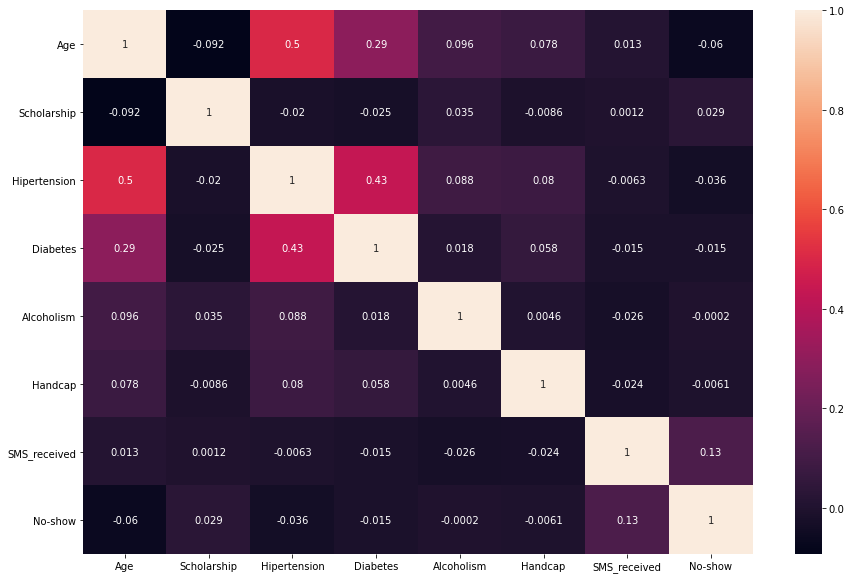

In [31]:
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot = True)


## Data Engineering

### Difference Between dates

In [32]:
df["delta_hours"] = df["ScheduledDay"]-df["AppointmentDay"]
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,delta_hours
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0 days 18:38:08
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0 days 16:08:27
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,0 days 16:19:04
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0 days 17:29:31
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0 days 16:07:23


In [33]:
import datetime
df["delta_hours"] = df["delta_hours"]/datetime.timedelta(hours=1)

In [34]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,delta_hours
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,18.635556
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,16.140833
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,16.317778
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17.491944
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,16.123056


### Convert deltatimes to separate columns

In [35]:
lista = ["ScheduledDay","AppointmentDay"]

for i in lista:
    df["{}".format(i + "_day")] = df[i].dt.day
    df["{}".format(i + "_year")] = df[i].dt.year
    df["{}".format(i + "_hour")] = df[i].dt.hour

In [36]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,delta_hours,ScheduledDay_day,ScheduledDay_year,ScheduledDay_hour,AppointmentDay_day,AppointmentDay_year,AppointmentDay_hour
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,18.635556,29,2016,18,29,2016,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,16.140833,29,2016,16,29,2016,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,16.317778,29,2016,16,29,2016,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,17.491944,29,2016,17,29,2016,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,16.123056,29,2016,16,29,2016,0


### Adding weekday

In [37]:
import datetime
lista = ["ScheduledDay","AppointmentDay"]

for i in lista:
    df["{}".format(i + "_week")] = df[i].dt.weekday

In [38]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,No-show,delta_hours,ScheduledDay_day,ScheduledDay_year,ScheduledDay_hour,AppointmentDay_day,AppointmentDay_year,AppointmentDay_hour,ScheduledDay_week,AppointmentDay_week
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,0,18.635556,29,2016,18,29,2016,0,4,4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,0,16.140833,29,2016,16,29,2016,0,4,4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,0,16.317778,29,2016,16,29,2016,0,4,4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,0,17.491944,29,2016,17,29,2016,0,4,4
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,0,16.123056,29,2016,16,29,2016,0,4,4


### Creating Age Groups

In [39]:
bins = [-2,5,12,18,40,65,120]
labels = ["0","1","2","3","4","5"]

df["Age_gr"] = pd.cut(df.Age, bins, labels = labels)

In [40]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,delta_hours,ScheduledDay_day,ScheduledDay_year,ScheduledDay_hour,AppointmentDay_day,AppointmentDay_year,AppointmentDay_hour,ScheduledDay_week,AppointmentDay_week,Age_gr
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,18.635556,29,2016,18,29,2016,0,4,4,4
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,16.140833,29,2016,16,29,2016,0,4,4,4
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,16.317778,29,2016,16,29,2016,0,4,4,4
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,17.491944,29,2016,17,29,2016,0,4,4,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,16.123056,29,2016,16,29,2016,0,4,4,4


### Changing Gender to binary

In [41]:
gender_dic = {"F" : 0, "M" : 1}
df["Gender"] = df["Gender"].map(gender_dic)

In [42]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,...,delta_hours,ScheduledDay_day,ScheduledDay_year,ScheduledDay_hour,AppointmentDay_day,AppointmentDay_year,AppointmentDay_hour,ScheduledDay_week,AppointmentDay_week,Age_gr
0,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,...,18.635556,29,2016,18,29,2016,0,4,4,4
1,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,...,16.140833,29,2016,16,29,2016,0,4,4,4
2,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,...,16.317778,29,2016,16,29,2016,0,4,4,4
3,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,...,17.491944,29,2016,17,29,2016,0,4,4,1
4,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,...,16.123056,29,2016,16,29,2016,0,4,4,4


### Dropping date

In [43]:
df.drop(["ScheduledDay","AppointmentDay"],axis = 1, inplace = True)

### One Hot Encoding of Neighbourhood

In [44]:
df = pd.get_dummies(df, columns = ["Neighbourhood"])

###  Convert all variables to numeric

In [45]:
df = df.astype(float)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 100 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   Gender                                     110527 non-null  float64
 1   Age                                        110527 non-null  float64
 2   Scholarship                                110527 non-null  float64
 3   Hipertension                               110527 non-null  float64
 4   Diabetes                                   110527 non-null  float64
 5   Alcoholism                                 110527 non-null  float64
 6   Handcap                                    110527 non-null  float64
 7   SMS_received                               110527 non-null  float64
 8   No-show                                    110527 non-null  float64
 9   delta_hours                                110527 non-null  float64
 10  Schedul

## Applying machine learning

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("No-show", axis = 1), df["No-show"])

### Selecting the correct model

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

In [55]:
models = []
models.append(("RF", RandomForestClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("AB",AdaBoostClassifier()))
models.append(("KNN",AdaBoostClassifier()))
models.append(("CB",CatBoostClassifier()))

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

Name = []
CVscore = []

for name, model in models:
    kfold = KFold(n_splits = 10)
    cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring = "accuracy")
    Name.append(name)
    CVscore.append(cv_result)




s
613:	learn: 0.4054606	total: 18.6s	remaining: 11.7s
614:	learn: 0.4054295	total: 18.6s	remaining: 11.7s
615:	learn: 0.4053873	total: 18.7s	remaining: 11.6s
616:	learn: 0.4053501	total: 18.7s	remaining: 11.6s
617:	learn: 0.4052916	total: 18.7s	remaining: 11.6s
618:	learn: 0.4052654	total: 18.7s	remaining: 11.5s
619:	learn: 0.4052174	total: 18.8s	remaining: 11.5s
620:	learn: 0.4051774	total: 18.8s	remaining: 11.5s
621:	learn: 0.4051305	total: 18.8s	remaining: 11.4s
622:	learn: 0.4050882	total: 18.9s	remaining: 11.4s
623:	learn: 0.4050394	total: 18.9s	remaining: 11.4s
624:	learn: 0.4049945	total: 18.9s	remaining: 11.3s
625:	learn: 0.4049544	total: 18.9s	remaining: 11.3s
626:	learn: 0.4049126	total: 19s	remaining: 11.3s
627:	learn: 0.4048857	total: 19s	remaining: 11.3s
628:	learn: 0.4048343	total: 19s	remaining: 11.2s
629:	learn: 0.4047928	total: 19s	remaining: 11.2s
630:	learn: 0.4047411	total: 19.1s	remaining: 11.2s
631:	learn: 0.4046933	total: 19.1s	remaining: 11.1s
632:	learn: 0.4046

In [75]:
means = []
stds = []
for i in range(len(CVscore)):
    means.append(CVscore[i].mean())
    stds.append(CVscore[i].std())

In [76]:
Model_comparison = pd.DataFrame({"Name" : Name, "CVSmean" : means, "CVSstd" : stds})
Model_comparison.CVSmean = Model_comparison.CVSmean.sort_values(ascending = False)

In [77]:
Model_comparison

,Name,CVSmean,CVSstd
0,RF,0.805320,0.003687
1,GB,0.799216,0.003040
2,AB,0.798564,0.003405
3,KNN,0.798564,0.003405
4,CB,0.804246,0.003208


In [78]:
### Even with RF  having the higher accuracy score, I will use Catboost

### Appliying Catboost

In [55]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [50]:
model = CatBoostClassifier(loss_function='Logloss', eval_metric="Accuracy")


In [51]:
model.fit(X_train,y_train)

: 13.5s
613:	learn: 0.8102901	total: 21.5s	remaining: 13.5s
614:	learn: 0.8102419	total: 21.5s	remaining: 13.5s
615:	learn: 0.8102901	total: 21.6s	remaining: 13.4s
616:	learn: 0.8103143	total: 21.6s	remaining: 13.4s
617:	learn: 0.8102660	total: 21.6s	remaining: 13.4s
618:	learn: 0.8103143	total: 21.7s	remaining: 13.3s
619:	learn: 0.8103384	total: 21.7s	remaining: 13.3s
620:	learn: 0.8103866	total: 21.7s	remaining: 13.3s
621:	learn: 0.8103746	total: 21.8s	remaining: 13.2s
622:	learn: 0.8104831	total: 21.8s	remaining: 13.2s
623:	learn: 0.8104952	total: 21.8s	remaining: 13.2s
624:	learn: 0.8104831	total: 21.9s	remaining: 13.1s
625:	learn: 0.8104952	total: 21.9s	remaining: 13.1s
626:	learn: 0.8104952	total: 21.9s	remaining: 13s
627:	learn: 0.8105314	total: 22s	remaining: 13s
628:	learn: 0.8105314	total: 22s	remaining: 13s
629:	learn: 0.8105796	total: 22s	remaining: 12.9s
630:	learn: 0.8106279	total: 22.1s	remaining: 12.9s
631:	learn: 0.8106641	total: 22.1s	remaining: 12.9s
632:	learn: 0.81

In [53]:
pred = model.predict(X_test)

In [54]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89     26940
         1.0       0.07      0.58      0.13       692

    accuracy                           0.80     27632
   macro avg       0.53      0.69      0.51     27632
weighted avg       0.96      0.80      0.87     27632



<AxesSubplot:>

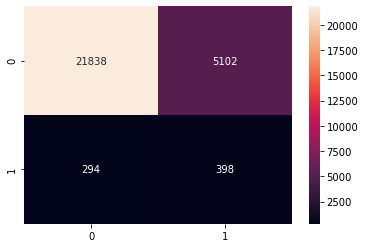

In [61]:
cm = confusion_matrix(pred, y_test)
sns.heatmap(cm, annot = True, fmt='g')

### Feature Importance

In [87]:
fi = model.get_feature_importance()
feat = pd.DataFrame({"Feature" : X_train.columns, "Value" : fi})
feat = feat.sort_values("Value", ascending = False)
feat


,Feature,Value
8,delta_hours,36.755138
1,Age,11.834146
11,ScheduledDay_hour,6.406037
12,AppointmentDay_day,6.000287
9,ScheduledDay_day,5.699686
...,...,...
52,Neighbourhood_ILHAS OCEÂNICAS DE TRINDADE,0.001897
18,Neighbourhood_AEROPORTO,0.000973
69,Neighbourhood_PARQUE INDUSTRIAL,0.000000
14,AppointmentDay_hour,0.000000


In [90]:
feat_top = feat.head(20)
feat_top

,Feature,Value
8,delta_hours,36.755138
1,Age,11.834146
11,ScheduledDay_hour,6.406037
12,AppointmentDay_day,6.000287
9,ScheduledDay_day,5.699686
15,ScheduledDay_week,3.916652
16,AppointmentDay_week,3.844430
17,Age_gr,2.948949
0,Gender,1.941617
3,Hipertension,1.057102


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'delta_hours'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'ScheduledDay_hour'),
  Text(3, 0, 'AppointmentDay_day'),
  Text(4, 0, 'ScheduledDay_day'),
  Text(5, 0, 'ScheduledDay_week'),
  Text(6, 0, 'AppointmentDay_week'),
  Text(7, 0, 'Age_gr'),
  Text(8, 0, 'Gender'),
  Text(9, 0, 'Hipertension'),
  Text(10, 0, 'Scholarship'),
  Text(11, 0, 'SMS_received'),
  Text(12, 0, 'Neighbourhood_SANTOS DUMONT'),
  Text(13, 0, 'Handcap'),
  Text(14, 0, 'Alcoholism'),
  Text(15, 0, 'Neighbourhood_GURIGICA'),
  Text(16, 0, 'Neighbourhood_SÃO JOSÉ'),
  Text(17, 0, 'Neighbourhood_RESISTÊNCIA'),
  Text(18, 0, 'Neighbourhood_SÃO PEDRO'),
  Text(19, 0, 'Diabetes')])

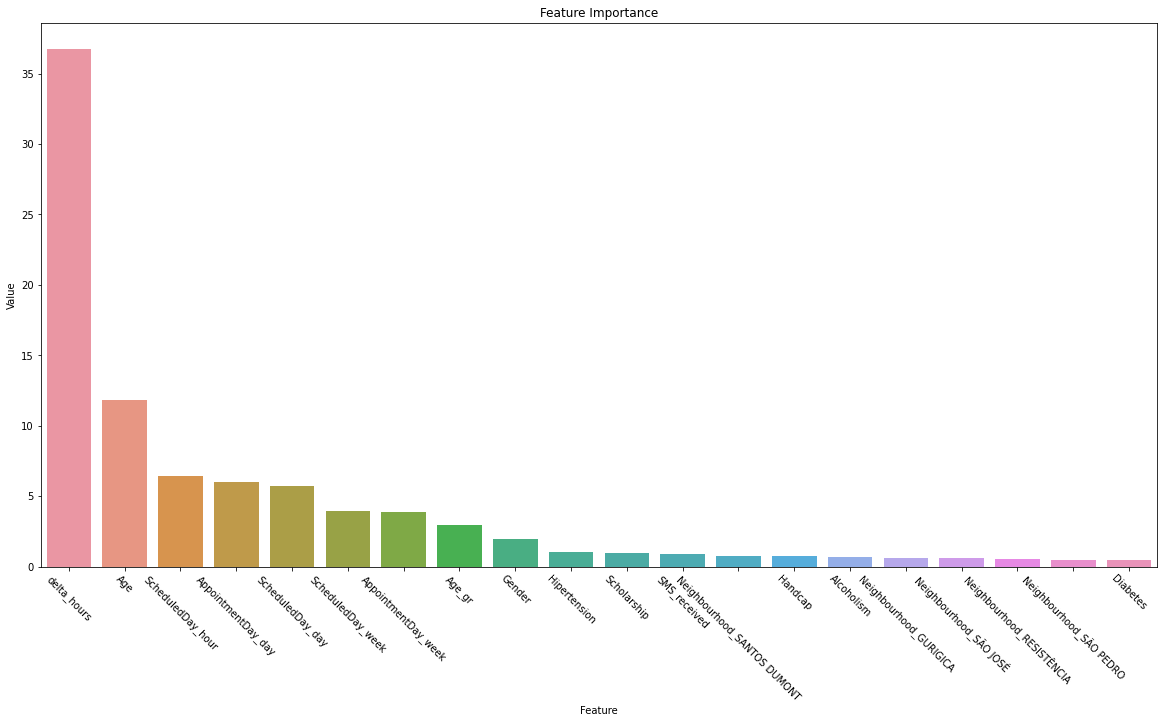

In [95]:
plt.figure(figsize = (20,10))
sns.barplot(feat_top.Feature, feat_top.Value)
plt.title("Feature Importance")
plt.xticks(rotation = -45, size = 10)